## COVID RECOVERY RATES

In this project I will be using a Covid-19 dataset that has data for pre-existing health conditions along with other data.

I will be analysing the data and creating a model to predict whether or not a patient will die or recover.

In the original dataset 1 is yes and 2 is no

## Importing the libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, precision_score as precision, f1_score as f1, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

import statsmodels.api as sm

from imblearn.under_sampling import RandomUnderSampler

## Importing the data

In [2]:
covid = pd.read_csv('/Users/katiejones/Documents/Digital Futures/DATASETS/Covid Data.csv', encoding = 'utf-8', encoding_errors='ignore')

## Exploratory Data Analysis

1. Basic EDA - check the top 20 rows, bottom 20 rows, number of rows and columns, datatypes, and null values

In [3]:
## Looking at the top 20 rows

covid.head(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [4]:
## Looking at the bottom 20 rows

covid.tail(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048555,1,13,2,1,9999-99-99,97,2,30,97,2,...,2,2,2,2,2,2,2,2,7,97
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048557,2,13,2,1,9999-99-99,97,2,51,97,2,...,2,2,1,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048559,2,13,2,1,9999-99-99,97,2,51,97,2,...,2,2,2,2,2,2,2,2,7,97
1048560,1,13,2,1,9999-99-99,97,2,77,97,2,...,2,2,2,2,2,2,2,2,7,97
1048561,2,13,2,1,9999-99-99,97,2,45,97,2,...,2,2,1,1,1,2,2,1,7,97
1048562,2,13,2,1,9999-99-99,97,2,57,97,2,...,2,2,2,2,2,2,2,2,7,97
1048563,2,13,1,1,9999-99-99,97,2,46,2,2,...,2,2,2,2,2,2,2,2,7,97
1048564,1,13,1,1,9999-99-99,97,2,30,2,2,...,2,2,2,2,2,2,2,1,7,97


In [5]:
## Looking at the shape of the dataset

covid.shape

(1048575, 21)

In [6]:
## Looking at the column names

covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [7]:
## Looking at the datatypes

covid.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [8]:
## Looking at the stats of the data

covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [9]:
## Checking nulls and datatypes

covid.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [10]:
## Checking nulls

covid.isnull().sum()

## I know from kaggle that null values are shown as 97 or 98, so they do not show up here

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [11]:
## look at the % of each value in each category

def percentage (category):
    return covid[category].value_counts(normalize=True).mul(100).round(2)

plotlist = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
            'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
            'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
            'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']

[percentage(category) for category in plotlist]

[2    63.22
 1    36.78
 Name: USMER, dtype: float64,
 12    57.51
 4     29.98
 6      3.87
 9      3.64
 3      1.83
 8      0.99
 10     0.75
 5      0.69
 11     0.53
 13     0.09
 7      0.08
 2      0.02
 1      0.01
 Name: MEDICAL_UNIT, dtype: float64,
 1    50.07
 2    49.93
 Name: SEX, dtype: float64,
 1    80.92
 2    19.08
 Name: PATIENT_TYPE, dtype: float64,
 9999-99-99    92.66
 06/07/2020     0.10
 07/07/2020     0.09
 13/07/2020     0.09
 16/06/2020     0.09
               ...  
 24/11/2020     0.00
 17/12/2020     0.00
 08/12/2020     0.00
 16/03/2021     0.00
 22/04/2021     0.00
 Name: DATE_DIED, Length: 401, dtype: float64,
 97    80.92
 2     15.17
 1      3.21
 99     0.70
 Name: INTUBED, dtype: float64,
 2     85.12
 1     13.36
 99     1.53
 Name: PNEUMONIA, dtype: float64,
 30     2.58
 31     2.47
 28     2.41
 29     2.40
 34     2.37
        ... 
 114    0.00
 116    0.00
 111    0.00
 121    0.00
 113    0.00
 Name: AGE, Length: 121, dtype: float64,
 97    4

In [12]:
## before we do anything to alter the original dataset we want to create a copy

df = covid.copy()

2. Add a new column that determines whether the patient died or recovered

In [13]:
## adding a new column that says whether a patient died or not
## '9999-99-99' indicates a patient surviving so when there is a date it means the patient died

df['died'] = df['DATE_DIED'] != '9999-99-99'

df.groupby(['died'])[['died']].count()

,died
died,
False,971633
True,76942


In [14]:
## we want to change True and False to numerical values
## 1 = yes died, 0 = no recovered

df.replace({False: 0, True: 1}, inplace=True)

df.groupby(['died'])[['died']].count()

,died
died,
0,971633
1,76942


In [15]:
## we also want to replace '9999-99-99' with 'recovered'

df['DATE_DIED'].replace({'9999-99-99' : 'recovered'}, inplace=True)

df['DATE_DIED'].value_counts()

recovered     971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [16]:
## export the dataframe to excel so it can be used in tableau

#df.to_excel('/Users/katiejones/Documents/Digital Futures/DATASETS/covid.xlsx', index=True)

3. Raw visualisations

In [17]:
## Function to plot the proportions of each category that died and recovered
## Died = 1 and recovered = 0

def graph(category):
    plt.figure(figsize = (5,3))
    ax = sns.countplot(x=df[category], hue=df['died'], palette = 'coolwarm')
    plt.title(f'Number of Deaths and Recoveries by {category}')

    plt.xticks(
        horizontalalignment='right',
        fontweight='light',
        fontsize='large', wrap=True
    )
    plt.show()
    return ax

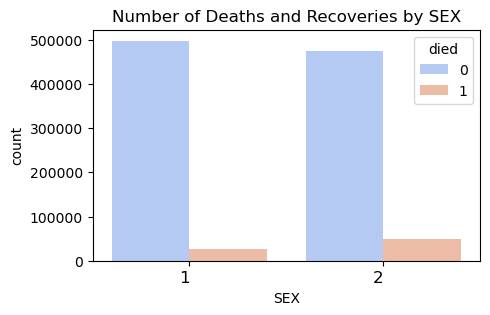

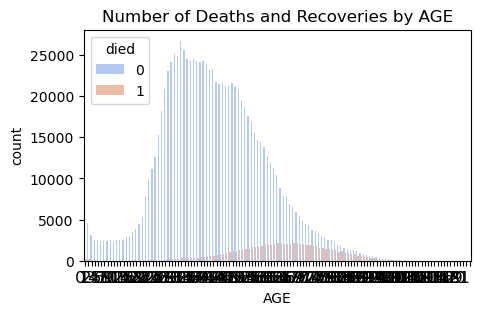

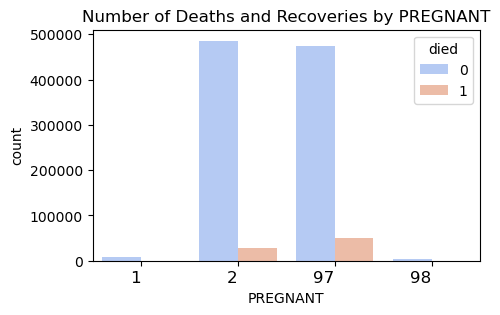

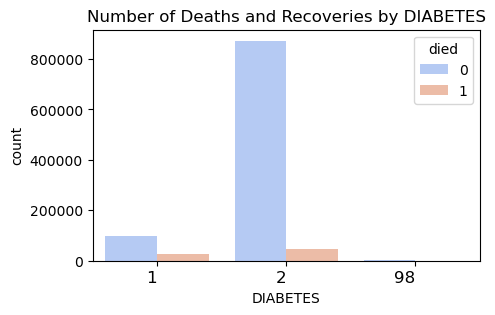

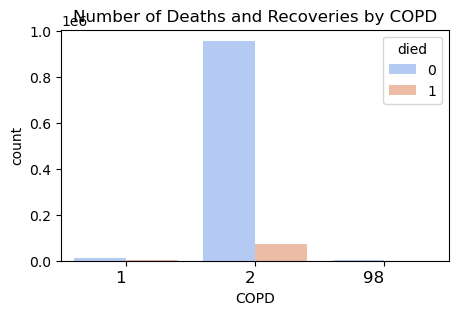

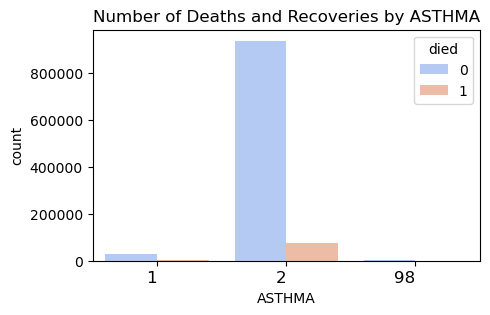

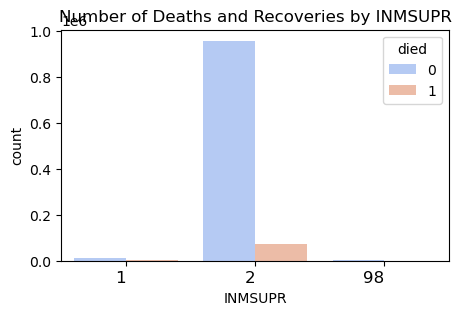

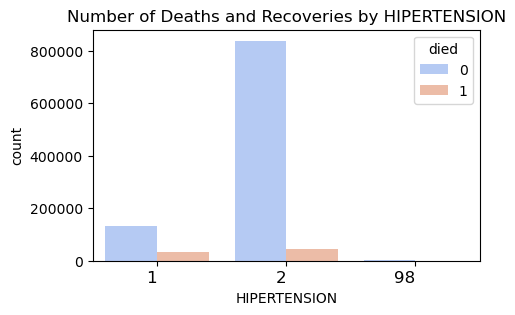

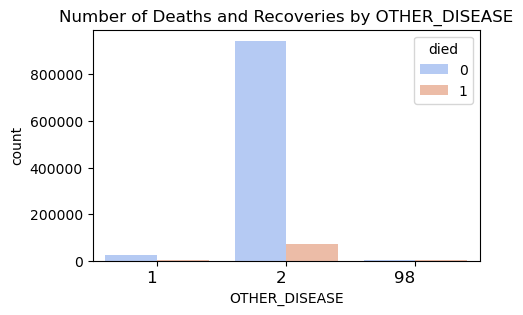

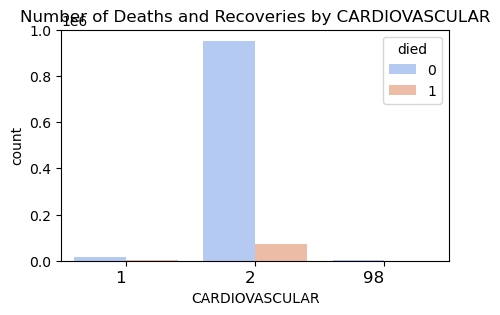

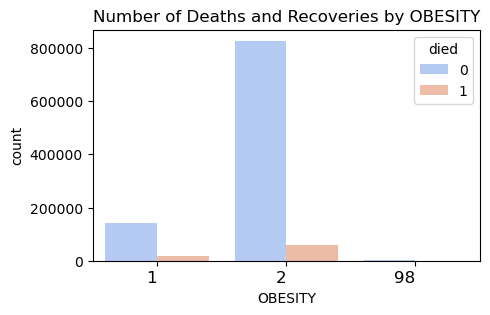

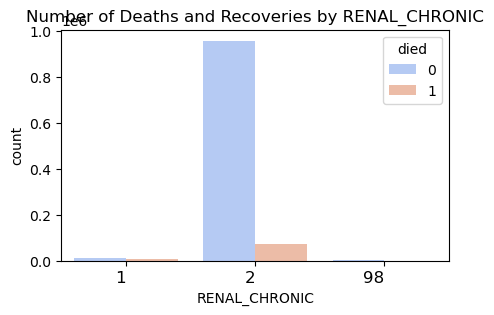

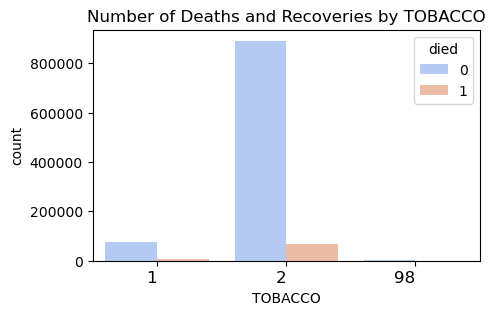

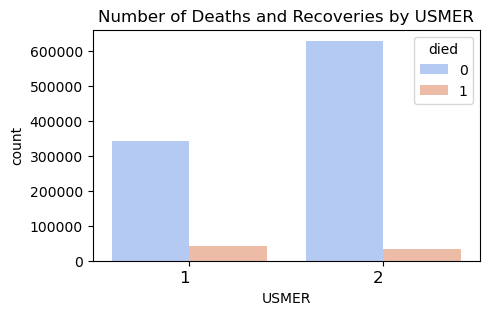

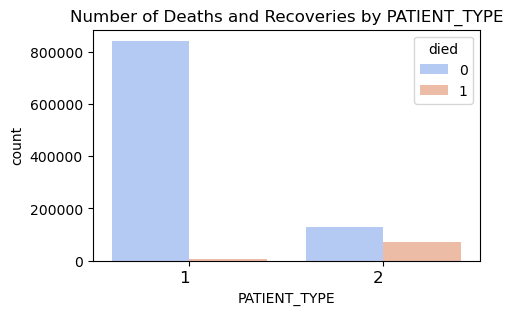

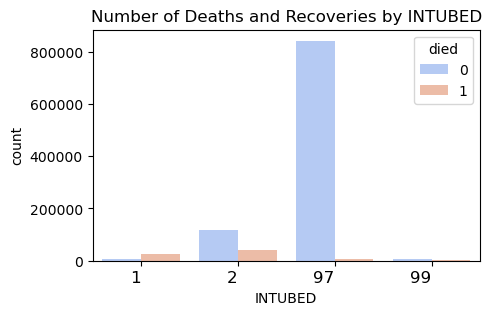

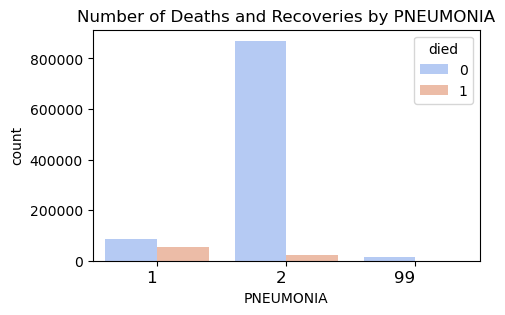

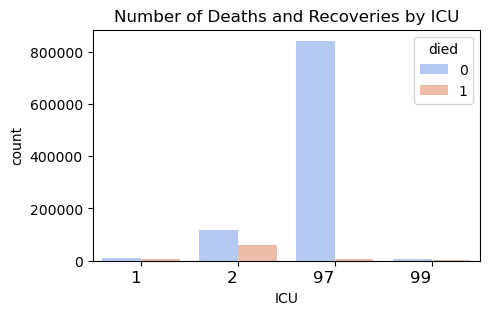

[<AxesSubplot:title={'center':'Number of Deaths and Recoveries by SEX'}, xlabel='SEX', ylabel='count'>,
 <AxesSubplot:title={'center':'Number of Deaths and Recoveries by AGE'}, xlabel='AGE', ylabel='count'>,
 <AxesSubplot:title={'center':'Number of Deaths and Recoveries by PREGNANT'}, xlabel='PREGNANT', ylabel='count'>,
 <AxesSubplot:title={'center':'Number of Deaths and Recoveries by DIABETES'}, xlabel='DIABETES', ylabel='count'>,
 <AxesSubplot:title={'center':'Number of Deaths and Recoveries by COPD'}, xlabel='COPD', ylabel='count'>,
 <AxesSubplot:title={'center':'Number of Deaths and Recoveries by ASTHMA'}, xlabel='ASTHMA', ylabel='count'>,
 <AxesSubplot:title={'center':'Number of Deaths and Recoveries by INMSUPR'}, xlabel='INMSUPR', ylabel='count'>,
 <AxesSubplot:title={'center':'Number of Deaths and Recoveries by HIPERTENSION'}, xlabel='HIPERTENSION', ylabel='count'>,
 <AxesSubplot:title={'center':'Number of Deaths and Recoveries by OTHER_DISEASE'}, xlabel='OTHER_DISEASE', ylabel=

In [18]:
plotlist = ['SEX', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
            'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'USMER', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
            'ICU']

[graph(i) for i in plotlist]

4. Create a new dataset just containing patients that died

In [19]:
deaths = df.copy()
deaths.drop(deaths.index[df['DATE_DIED'] == 'recovered'], inplace=True)
deaths

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,died
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,18/07/2020,1,1,73,97,2,...,2,1,2,2,1,2,2,3,2,1
1047636,1,13,2,1,26/07/2020,97,1,82,97,2,...,2,1,2,2,2,2,2,3,97,1
1047637,1,13,1,1,27/07/2020,97,1,82,2,2,...,2,2,2,2,2,2,2,3,97,1
1047638,1,13,2,2,29/07/2020,1,1,80,97,2,...,2,2,2,2,1,2,2,3,2,1


In [20]:
## change date_died datatype to date

deaths['DATE_DIED'] = pd.to_datetime(deaths['DATE_DIED'], dayfirst=True)

In [21]:
## set the index to date and sort it

deaths.set_index('DATE_DIED', inplace=True)
deaths.sort_index(inplace=True)

In [22]:
deaths

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,died
DATE_DIED,,,,,,,,,,,,,,,,,,,,,
2020-01-02,2,4,1,2,99,99,65,2,2,2,...,1,2,2,2,2,2,2,7,99,1
2020-01-03,1,12,2,2,1,1,47,97,2,2,...,2,2,2,2,2,2,2,5,1,1
2020-01-03,1,4,2,2,99,99,15,97,2,2,...,2,2,2,2,2,2,2,7,99,1
2020-01-03,1,4,1,2,99,99,67,2,1,2,...,2,2,2,2,1,2,2,7,99,1
2020-01-03,1,8,1,2,99,99,67,2,2,1,...,1,1,2,2,1,2,2,7,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-02,1,12,2,2,1,1,38,97,2,2,...,2,1,2,2,1,2,2,6,1,1
2021-05-02,1,12,2,2,2,1,38,97,2,2,...,2,2,2,2,2,2,2,6,1,1
2021-05-02,1,12,2,2,2,1,47,97,2,2,...,2,2,2,2,2,2,2,6,2,1


In [23]:
## Plotting total deaths for each month

plt.figure(figsize=(10,6))
plt.plot(deaths['died'].resample('M').count())
plt.title('Monthy Covid Deaths', fontsize=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
plt.show()

In [ ]:
## exporting the deaths dataframe into excel for use in tableau

#deaths.to_excel('/Users/katiejones/Documents/Digital Futures/DATASETS/covidDeaths.xlsx', index=True)

In [ ]:
## Function to look at the number of deaths from each category

def died (category):
    plt.figure(figsize = (5,3))
    ax = sns.countplot(x=deaths[category], palette = 'coolwarm')
    plt.title(f'Number of Deaths by {category}')

    plt.xticks(
        horizontalalignment='right',
        fontweight='light',
        fontsize='large', wrap=True
    )
    plt.show()
    return ax

In [ ]:
## Using the same plotlist from above

[died(i) for i in plotlist]

## Cleaning the Data

We need to address nulls and sort out the column names

Null values are shown as 97, 98 and 99
- 97, 98 and 99 show in intubed, pneumonia, age, pregnant, diabetes, copd, asthma, inmusupr, hipertension, other_disease, cardiovascular, obesity, renal_chronic, tobacco and icu

In [ ]:
## Checking what values are in each column

for column in df:
    print(df[column].value_counts())

In [ ]:
## pregnant column

df.groupby('PREGNANT')[['SEX']].value_counts()

In [ ]:
## For pregnant, where the value is 97, the patient is a male so all 97s can be changed to 2 for no

df['PREGNANT'] = df['PREGNANT'].replace(97, 2)

df.groupby('PREGNANT')[['SEX']].value_counts()

In [ ]:
## To address the nulls we want to create a new column for each factor
## we can map 1 as 1 and 2 as 0 which will change everything else (97, 98 and 99) to nulls
## we also want to change the column names to lower case to make them easier to work with

column = ['SEX','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO', 'USMER','PATIENT_TYPE','INTUBED','PNEUMONIA','ICU']

for column in column:
    new = '{}'.format(column.lower())
    df[new] = df[column].map({1:1, 2:0})

df.head()

In [ ]:
## we can now create a new dataframe with the new column names
## we need to remember to include 'AGE', 'MEDICAL_UNIT', 'CLASSIFICATION_FINAL, 'died' and 'DATE_DIED

df_new = df[['sex', 'AGE', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension', 'other_disease',
             'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'usmer', 'patient_type', 'intubed',
             'pneumonia', 'icu', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL', 'died', 'DATE_DIED']]

df_new.head()

In [ ]:
## create new column names to make it easier to work with

new_names = {'AGE':'age','inmsupr':'immunosup','hipertension':'hypertension','MEDICAL_UNIT':'medical_unit','CLASIFFICATION_FINAL':'classification','DATE_DIED':'date_died'}

df_new.rename(columns = new_names, inplace = 'True')

df_new.head()

In [ ]:
## create a copy to remove nulls

df_new1 = df_new.copy()

In [ ]:
## create a new dataset with all nulls removed - incase I want to use it later

df_all = df_new1.dropna(subset = ['pregnant','diabetes','copd','asthma','immunosup','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco', 'pneumonia','intubed','icu'])

print(df_all.shape)
df_all.isnull().sum()

In [ ]:
## 'intubed' and 'icu' have a large proportion of nulls so it is better for now to drop them.
## there are a small proportion of nulls in 'pregnant','diabetes','copd','asthma','immunosup','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco' and 'pneumonia', so we can remove those nulls without it having impact on the dataset.

df_new1 = df_new1.dropna(subset = ['pregnant','diabetes','copd','asthma','immunosup','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco','pneumonia'])

df_new1 = df_new1.drop(columns = ['intubed','icu'])

print(df_new1.shape)
print(df_new1.isnull().sum())

We need to look at the age column

In [ ]:
df_new1['age'].agg(['mean','min','max'])

In [ ]:
df_new1['age'].value_counts()

In [ ]:
## visualise 'age'

plt.figure(figsize = (20,10))
sns.countplot(x = 'age', data = df_new1)
plt.show()

In [ ]:
## We need to create age groups
## 1 = 0-14, 2 = 15-24, 3 = 25-34, 4 = 35-44, 5 = 45-54, 5 = 55-64, 6 = 65-74, 7 = 75-84, 8 = 85+

def age_grouping (x):
    if x < 15:
        return '0-14'
    elif x < 25:
        return '15-24'
    elif x < 35:
        return '25-34'
    elif x < 45:
        return '35-44'
    elif x < 55:
        return '45-54'
    elif x < 65:
        return '55-64'
    elif x < 75:
        return '65-74'
    elif x < 85:
        return '75-84'
    else:
        return '85+'

df_new1['age_group'] = df_new1['age'].apply(age_grouping)

In [ ]:
## export the cleaned dataframe to excel so it can be used in tableau

##df_new1.to_excel('/Users/katiejones/Documents/Digital Futures/DATASETS/covid_cleaned.xlsx', index=True)

In [ ]:
## Number of patients without any of the conditions

no_condition = df_new1[(df_new1['asthma'] == 0) & (df_new1['cardiovascular'] == 0) & (df_new1['copd'] == 0) & (df_new1['diabetes'] == 0) & (df_new1['hypertension'] == 0) & (df_new1['immunosup'] == 0) & (df_new1['obesity'] == 0) & (df_new1['other_disease'] == 0) & (df_new1['pregnant'] == 0) & (df_new1['renal_chronic'] == 0) & (df_new1['tobacco'] == 0)]

no_condition

In [ ]:
no_condition['died'].value_counts()

In [ ]:
df_new1

## Some more Visualisations on the cleaned dataset

In [ ]:
## visualise correlations

plt.figure(figsize = (15,8))
sns.heatmap(df_new1.corr(),annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
## Visualise what proportion of patients died and recovered

#plt.figure(figsize = (5,3))
sns.countplot(x=df_new1['died'], palette='coolwarm')
plt.title('Total Deaths and Recoveries')
plt.show()

df_new1['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Look at the spread of each age group

sns.countplot(data = df_new1,
              x = 'age_group',
              palette = 'coolwarm',
              order = ['0-14','15-24','25-34','35-44','45-54','55-64','65-74','75-84','85+'])
plt.title('Age of Patients')
plt.show()

In [ ]:
## visualise the proportion of who died and recovered for each age group

sns.countplot(x= df_new1['age_group'], hue= df_new1['died'],order = ['0-14','15-24','25-34','35-44','45-54','55-64','65-74','75-84','85+'], palette = 'coolwarm')

plt.xticks(horizontalalignment='right',fontweight ='light',fontsize ='large', wrap = True)
plt.show()

In [ ]:
## creating a clean dataset of those that died

deaths1 = df_new1.copy()
deaths1.drop(deaths1.index[df_new1['date_died'] == 'recovered'], inplace=True)
deaths1

In [ ]:
## A plot of how many patients from each age group died

sns.countplot(data = deaths1,
              x = 'age_group',
              palette = 'coolwarm',
              order = ['0-14','15-24','25-34','35-44','45-54','55-64','65-74','75-84','85+'])
plt.title('Number of Deaths per Age Group')
plt.show()

Plotting proportions of each category that died and recovered

In [ ]:
## Pregnant

pregnant = df.copy()
pregnant.drop(pregnant[pregnant['PREGNANT'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=pregnant['died'], palette='coolwarm')
plt.title('Pregnancy')
plt.show()

pregnant['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Diabetes

d = df.copy()
d.drop(d[d['DIABETES'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=d['died'], palette='coolwarm')
plt.title('Diabetes')
plt.show()

d['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## COPD

copd = df.copy()
copd.drop(copd[copd['COPD'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=copd['died'], palette='coolwarm')
plt.title('COPD')
plt.show()

copd['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Asthma

a = df.copy()
a.drop(a[a['ASTHMA'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=a['died'], palette='coolwarm')
plt.title('Asthma')
plt.show()
a['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Immunosuppressants

i = df.copy()
i.drop(i[i['INMSUPR'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=i['died'], palette='coolwarm')
plt.title('Immunosuppressed')
plt.show()

i['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Hypertension

h = df.copy()
h.drop(h[h['HIPERTENSION'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=h['died'], palette='coolwarm')
plt.title('Hypertension')
plt.show()

h['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Other Disease

o_d = df.copy()
o_d.drop(o_d[o_d['OTHER_DISEASE'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=o_d['died'], palette='coolwarm')
plt.title('Other Disease')
plt.show()

o_d['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Cardiovascular

cv = df.copy()
cv.drop(cv[cv['CARDIOVASCULAR'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=cv['died'], palette='coolwarm')
plt.title('Cardiovascular')
plt.show()

cv['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Obesity

o = df.copy()
o.drop(o[o['OBESITY'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=o['died'], palette='coolwarm')
plt.title('Obesity')
plt.show()

o['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Renal Chronic

r_c = df.copy()
r_c.drop(r_c[r_c['RENAL_CHRONIC'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=r_c['died'], palette='coolwarm')
plt.title('Chronic Renal Disease')
plt.show()

r_c['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## Tobacco

t = df.copy()
t.drop(t[t['TOBACCO'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x=t['died'], palette='coolwarm')
plt.title('Tobacco Users')
plt.show()

t['died'].value_counts(normalize=True).mul(100).round(2)

To look at proportions of each age group that died we need to One Hot Encode (OHE).

Here I am creating a new OHE dataset just to visualise - I will do it properly later on.

In [ ]:
## One Hot Encode (OHE) age_group

def ohe(data):
    data = pd.get_dummies(data, columns = ['age_group'])
    data.drop(columns = ['age_group_0-14'], inplace=True)
    return data

In [ ]:
df_new2 = ohe(df_new1)

In [ ]:
## Over 85

over_85 = df_new2.copy()
over_85.drop(over_85[over_85['age_group_85+'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x= over_85['died'], palette = 'coolwarm')
plt.title('over_85')
plt.show()

over_85['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## age_group_75-84

age_group_75to84 = df_new2.copy()
age_group_75to84.drop(age_group_75to84[age_group_75to84['age_group_75-84'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x= age_group_75to84['died'], palette = 'coolwarm')
plt.title('75to84')
plt.show()

age_group_75to84['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## age_group_65to74

age_group_65to74 = df_new2.copy()
age_group_65to74.drop(age_group_65to74[age_group_65to74['age_group_65-74'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x= age_group_65to74['died'], palette = 'coolwarm')
plt.title('65to74')
plt.show()

age_group_65to74['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## age_group_55to64

age_group_55to64 = df_new2.copy()
age_group_55to64.drop(age_group_55to64[age_group_55to64['age_group_55-64'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x= age_group_55to64['died'], palette = 'coolwarm')
plt.title('55to64')
plt.show()

age_group_55to64['died'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
## age_group_45to54

age_group_45to54 = df_new2.copy()
age_group_45to54.drop(age_group_45to54[age_group_45to54['age_group_45-54'] != 1].index, inplace=True)

plt.figure(figsize = (5,3))
sns.countplot(x= age_group_45to54['died'], palette = 'coolwarm')
plt.title('45to54')
plt.show()

age_group_45to54['died'].value_counts(normalize=True).mul(100).round(2)

## Modelling

1. Sample the data

In [ ]:
## sample to use 1% of the data to test the models - will convert back to the original when I have a final model

sampled = df_new1.sample(frac=0.01, random_state=42)

In [ ]:
## checking the sample has similar proportions of 'died' to the original

sampled['died'].value_counts(normalize=True)

In [ ]:
df_new1['died'].value_counts(normalize=True)

## Train Test Split

In [ ]:
## splitting the target value (y) from the rest of the dataframe

X = sampled.drop(columns=['died'])
y = sampled['died']

## applying train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

## Feature Engineering

In [ ]:
## Function to remove 'patient_type','pneumonia','medical_unit','classification','usmer','date_died','age'

def drop (data):
    data.drop(columns = ['patient_type','pneumonia','medical_unit','classification','usmer','date_died','age'], inplace = True)
    return data

In [ ]:
## Function to One Hot Encode (OHE) age_group

def ohe(data):
    data = pd.get_dummies(data, columns = ['age_group'])
    data.drop(columns = ['age_group_0-14'], inplace=True)
    return data

In [ ]:
## function combining the two above

def feature_eng(dfr):
    dfr = drop(dfr)
    dfr = ohe(dfr)
    return dfr

In [ ]:
## apply feature engineering function to the train set

X_train = feature_eng(X_train)

In [ ]:
## Function getting confusion matrix and scores

def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {accuracy(actual, predicted)}')
    print(f'The recall of your model is: {recall(actual, predicted)}')
    print(f'The precision of your model is: {precision(actual, predicted)}')
    print(f'The F1-score of your model is: {f1(actual, predicted)}')

In [ ]:
## creating an empty dataframe to store the results in

results = pd.DataFrame(columns = ['model','accuracy','recall','precision','f1_score'])

## function to store the results

def measures (name, actual, predicted):
    dict = {'model':name, 'accuracy':accuracy(actual, predicted), 'recall':recall(actual, predicted), 'precision': precision(actual, predicted), 'f1_score': f1(actual, predicted)}
    return dict


## Logistic Regression

In [ ]:
## Function for Logistic Regression

lr = LogisticRegression(max_iter=300, random_state=10)

def lre(X,y, cutoff):
    lr.fit(X, y)
    lr_results = X.copy()
    lr_results[['recovered', 'died']] = lr.predict_proba(X)
    lr_results['y_pred_lr'] = np.where(lr_results['died'] > cutoff, 1, 0)
    return lr_results

In [ ]:
lr.coef_[0]

## Decision Trees

In [ ]:
## Finding the best parameters to use for decision trees

grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 50],
                                'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 18, 20, 22, 25]},
                    cv=5,
                    refit=True,
                    verbose=2,
                    scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

In [ ]:
## Decision Trees function

dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=22, min_samples_split=2)

def dtr(X,y,dt, cutoff):
    dt = dt.fit(X, y)
    dt_results = X.copy()
    dt_results['y_pred_dt'] = dt.predict(X)
    dt_results['y_real_dt'] = y
    dt_results['y_prob_dt'] = dt.predict_proba(X)[:,1]
    dt_results['y_pred_dt'] = np.where(dt_results['y_prob_dt'] > cutoff, 1, 0)
    return dt_results

## Random Forest

In [ ]:
## looking at best parameters to use

gs = GridSearchCV(RandomForestClassifier(),
                  param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8],
                              'n_estimators': [25, 50, 75, 100, 125, 150]},
                  cv=5)

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

In [ ]:
## Function for random forest

rf = RandomForestClassifier(n_estimators= 25, max_depth= 1)

def rfo(X,y, cutoff):
    rf.fit(X, y)
    rf_results = X.copy()
    rf_results['y_pred_rf'] = rf.predict(X)
    rf_results['y_real_rf'] = y
    rf_results['y_prob_rf'] = rf.predict_proba(X)[:,1]
    rf_results['y_pred_rf'] = np.where(rf_results['y_prob_rf'] > cutoff, 1, 0)
    return rf_results

## Evaluating the models on the train set

1. Logistic Regression

In [ ]:
## Apply the LR function to the train set and get the confusion matrix and scores

lr_results = lre(X_train, y_train, 0.4)
get_results(y_train,lr_results['y_pred_lr'])


In [ ]:
## putting the results in the dataframe

dict = measures('LogisticRegression', y_train,lr_results['y_pred_lr'])
results = results.append(dict, ignore_index = True)

2. Decision Trees

In [ ]:
## Apply the DT function to the train set and get the confusion matrix and scores

dt_results = dtr(X_train, y_train, dt, 0.4)
get_results(y_train,dt_results['y_pred_dt'])

In [ ]:
## putting the results in the dataframe

dict = measures('DecisionTree', y_train,dt_results['y_pred_dt'])
results = results.append(dict, ignore_index = True)

3. Random Forest

In [ ]:
## Apply the RF function to the train set and get the confusion matrix and scores

rf_results = rfo(X_train, y_train, 0.4)
get_results(y_train,rf_results['y_pred_rf'])

In [ ]:
## putting the results in the dataframe

dict = measures('RandomForest', y_train,rf_results['y_pred_rf'])
results = results.append(dict, ignore_index = True)

4. Compare results

In [ ]:
results

## Undersampling

- Got bad recall, precision and F1 scores because the target is very unbalanced
- I need to see if undersampling will help -> it is a technique used to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.
- I want to do this on the original unsampled data.

In [ ]:
## determine X and y

X = df_new1.drop(columns=['died'])
y = df_new1['died']

In [ ]:
## apply the random under sampler to X and y

rus = RandomUnderSampler(random_state=0)
X_resampled,y_resampled = rus.fit_resample(X,y)

In [ ]:
## look at proportions of died and recovered

plt.figure(figsize = (5,3))
ax = sns.countplot(x = y_res, palette='coolwarm')
plt.bar_label(ax.containers[0])
plt.show()

In [ ]:
## train test split

X_res, X_test1, y_res, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=45)

## Apply feature engineering to the new train sets

In [ ]:
X_res = feature_eng(X_res).copy()

## Apply the models to the new train sets

First we need to find the best parameters to use on the undersampled dataset

In [ ]:
## Finding the best parameters to use for decision trees

grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid={'max_depth': [2, 4, 6, 8, 10],
                                'min_samples_split': [5, 10, 15, 20, 50],
                                'min_samples_leaf': [2, 4, 6, 8, 10, 15, 20, 22]},
                    cv=5,
                    refit=True,
                    verbose=2,
                    scoring='accuracy')

grid.fit(X_res, y_res)

print(grid.best_params_)
print(grid.best_score_)

In [ ]:
## Decision Trees new function

dt1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50)

def dtr1 (X, y, dt1, cutoff):
    dt1 = dt1.fit(X, y)
    dt1_results = X.copy()
    dt1_results['y_pred_dt1'] = dt1.predict(X)
    dt1_results['y_real_dt1'] = y
    dt1_results['y_prob_dt1'] = dt1.predict_proba(X)[:, 1]
    dt1_results['y_pred_dt1'] = np.where(dt1_results['y_prob_dt1'] > cutoff, 1, 0)
    return dt1_results

In [ ]:
## looking at best parameters to use for random forest

gs = GridSearchCV(RandomForestClassifier(),
                  param_grid={'max_depth': [None, 2, 4, 6, 8],
                              'n_estimators': [25, 50, 75, 100]},
                  cv=5)

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

In [ ]:
## new function for random forest

rf1 = RandomForestClassifier(n_estimators=25, max_depth=8)

def rfo1 (X, y, cutoff):
    rf1.fit(X, y)
    rf1_results = X.copy()
    rf1_results['y_pred_rf1'] = rf1.predict(X)
    rf1_results['y_real_rf1'] = y
    rf1_results['y_prob_rf1'] = rf1.predict_proba(X)[:, 1]
    rf1_results['y_pred_rf1'] = np.where(rf1_results['y_prob_rf1'] > cutoff, 1, 0)
    return rf1_results

1. Logistic Regression

In [ ]:
## Apply the LR function to the train set and get the confusion matrix and scores

lr_results1 = lre(X_res, y_res, 0.4)
get_results(y_res,lr_results1['y_pred_lr'])

In [ ]:
## putting the results in the dataframe

dict = measures('LR_undersampled', y_res, lr_results1['y_pred_lr'])
results = results.append(dict, ignore_index = True)

2. Decision Trees

In [ ]:
## Apply the DT function to the train set and get the confusion matrix and scores

dt_results1 = dtr1(X_res, y_res, dt, 0.4)
get_results(y_res, dt_results1['y_pred_dt1'])


In [ ]:
## putting the results in the dataframe

dict = measures('DT_undersampled', y_res, dt_results1['y_pred_dt1'])
results = results.append(dict, ignore_index = True)

3. Random Forest

In [ ]:
## Apply the RF function to the train set and get the confusion matrix and scores

rf_results1 = rfo1(X_res, y_res, 0.4)
get_results(y_res, rf_results1['y_pred_rf1'])

In [ ]:
## putting the results in the dataframe

dict = measures('RF_undersampled', y_res, rf_results1['y_pred_rf1'])
results = results.append(dict, ignore_index = True)

4. Compare the results

In [ ]:
results

## Feature Selection to improve the models

In [ ]:
conditions = df_new1.copy()
conditions = feature_eng(conditions)

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(conditions.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
## 'diabetes','hypertension','age_group_55-64','age_group_65-74','age_group_75-84' and 'age_group_85+' have correlations >0.1 with 'died'
## 'copd','obesity' and 'renal_chronic' have correlations >0.05 with 'died'
## can use these as a start point for the feature columns

features = ['diabetes','hypertension','age_group_55-64','age_group_65-74','age_group_75-84','age_group_85+','copd','obesity','renal_chronic','sex','age_group_25-34','age_group_35-44']

features1 = ['diabetes','hypertension','age_group_55-64','age_group_65-74','age_group_75-84','age_group_85+']

X_res1 = X_res[features].copy()
X_res2 = X_res[features1].copy()

In [ ]:
## feature importance in Decision Trees

for name, importance in zip(X_res, dt.feature_importances_):
    print(name, "=", importance)

In [ ]:
## Lets say anything over 0.05 is important

features_dt = ['sex','renal_chronic','tobacco']

X_res3 = X_res[features_dt].copy()

In [ ]:
## Feature importance in Random Forest

for name, importance in zip(X_res, rf.feature_importances_):
    print(name, "=", importance)

In [ ]:
## Lets say anything over 0.05 is important

features_rf = ['diabetes','renal_chronic','age_group_25-34','age_group_35-44','age_group_65-74','age_group_75-84']

X_res4 = X_res[features_rf].copy()

## Testing 'features' on the models

1. Logistic Regression

In [ ]:
## Apply the LR function to the train set and get the confusion matrix and scores

lr_results2 = lre(X_res1, y_res, 0.4)
get_results(y_res,lr_results2['y_pred_lr'])

In [ ]:
## putting the results in the dataframe

dict = measures('LR_features', y_res, lr_results2['y_pred_lr'])
results = results.append(dict, ignore_index = True)

2. Decision Trees

In [ ]:
## Apply the DT function to the train set and get the confusion matrix and scores

dt_results2 = dtr1(X_res1, y_res, dt, 0.4)
get_results(y_res, dt_results2['y_pred_dt1'])

In [ ]:
## putting the results in the dataframe

dict = measures('DT_features', y_res, dt_results2['y_pred_dt1'])
results = results.append(dict, ignore_index = True)


3. Random Forest

In [ ]:
## Apply the RF function to the train set and get the confusion matrix and scores

rf_results2 = rfo1(X_res1, y_res, 0.44)
get_results(y_res, rf_results2['y_pred_rf1'])


In [ ]:
## putting the results in the dataframe

dict = measures('RF_features', y_res, rf_results2['y_pred_rf1'])
results = results.append(dict, ignore_index = True)

4. Comparing results

In [ ]:
results

## Testing ‘features1’ on the models

In [ ]:
## Apply the LR function to the train set and get the confusion matrix and scores

lr_results3 = lre(X_res2, y_res, 0.45)
get_results(y_res,lr_results3['y_pred_lr'])


In [ ]:
## putting the results in the dataframe

dict = measures('LR_features1', y_res, lr_results3['y_pred_lr'])
results = results.append(dict, ignore_index = True)


2. Decision Trees

In [ ]:
## Apply the DT function to the train set and get the confusion matrix and scores

dt_results3 = dtr1(X_res2, y_res, dt, 0.5)
get_results(y_res, dt_results3['y_pred_dt1'])


In [ ]:
## putting the results in the dataframe

dict = measures('DT_features1', y_res, dt_results3['y_pred_dt1'])
results = results.append(dict, ignore_index = True)


3. Random Forest

In [ ]:
## Apply the RF function to the train set and get the confusion matrix and scores

rf_results3 = rfo1(X_res2, y_res, 0.4)
get_results(y_res, rf_results3['y_pred_rf1'])

In [ ]:
## putting the results in the dataframe

dict = measures('RF_features1', y_res, rf_results3['y_pred_rf1'])
results = results.append(dict, ignore_index = True)


4. Comparing the results

In [ ]:
results

## Testing ‘features_dt’ and 'features_rf' on the models

1. Decision Trees

In [ ]:
## Apply the DT function to the train set and get the confusion matrix and scores

dt_results4 = dtr1(X_res3, y_res, dt, 0.5)
get_results(y_res, dt_results4['y_pred_dt1'])


In [ ]:
## putting the results in the dataframe

dict = measures('DT_features_dt', y_res, dt_results4['y_pred_dt1'])
results = results.append(dict, ignore_index = True)


2. Random Forest

In [ ]:
## Apply the RF function to the train set and get the confusion matrix and scores

rf_results4 = rfo1(X_res4, y_res, 0.45)
get_results(y_res, rf_results4['y_pred_rf1'])

In [ ]:
## putting the results in the dataframe

dict = measures('RF_features_rf', y_res, rf_results4['y_pred_rf1'])
results = results.append(dict, ignore_index = True)

3. Looking at the results

In [ ]:
results

## Combining the models

- lets try combining the models by working out the mode of y_preds

1. Combine the undersampled models

In [ ]:
## First lets combine the undersampled models

c = pd.DataFrame(columns = ['lr','dt','rf'])

c['lr'] = lr_results1['y_pred_lr']
c['dt'] = dt_results1['y_pred_dt1']
c['rf'] = rf_results1['y_pred_rf1']

In [ ]:
c['mode_y_pred'] = c.mode(axis='columns')

In [ ]:
combined = X_res.copy()
combined['target'] = y_res
combined['y_pred'] = c['mode_y_pred']

In [ ]:
## get the confusion matrix and scores

get_results(y_res, combined['y_pred'])

In [ ]:
## putting the results in the dataframe

dict = measures('undersampled_combined', y_res, combined['y_pred'])
results = results.append(dict, ignore_index = True)


2. Combine the 'features' models

In [ ]:
c1 = pd.DataFrame(columns = ['lr','dt','rf'])

c1['lr'] = lr_results2['y_pred_lr']
c1['dt'] = dt_results2['y_pred_dt1']
c1['rf'] = rf_results2['y_pred_rf1']

In [ ]:
c1['mode_y_pred'] = c1.mode(axis='columns')

In [ ]:
combined1 = X_res1.copy()
combined1['target'] = y_res
combined1['y_pred'] = c1['mode_y_pred']

In [ ]:
## get the confusion matrix and scores

get_results(y_res, combined1['y_pred'])

In [ ]:
## putting the results in the dataframe

dict = measures('features_combined', y_res, combined1['y_pred'])
results = results.append(dict, ignore_index = True)

## Comparing results to find the best models

In [ ]:
## Plot of accuracy, recall, precision and f1_score

results.plot(x='model', y = ['accuracy','recall','precision','f1_score'], kind = 'bar', figsize = (10,6), colormap = 'coolwarm_r')
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'small')
plt.title('Accuracy, Recall, Precision and F1 Scores of the Models')
plt.show()

In [ ]:
## Plot of accuracy seperate

plt.figure(figsize = (10,6))
sns.barplot(x='model', y='accuracy', data=results, palette='coolwarm')
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'small')
plt.show()

In [ ]:
## Plot of recall seperate

plt.figure(figsize = (10,6))
sns.barplot(x='model', y='recall', data=results, palette='coolwarm')
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'small')
plt.show()

In [ ]:
results.sort_values(by = 'accuracy', ascending = False)

In [ ]:
results.sort_values(by = 'recall', ascending = False)

In [ ]:
results.sort_values(by = 'precision', ascending = False)

In [ ]:
results.sort_values(by = 'f1_score', ascending = False)

## Testing the best models on the test set

In [ ]:
## apply feature engineering to the test set

X_test2 = feature_eng(X_test1).copy()

1. Logistic Regression Undersampled

In [ ]:
lr_results_test = lre(X_test2, y_test1, 0.4)
get_results(y_test1, lr_results_test['y_pred_lr'])

2. Logistic Regression Features

In [ ]:
## apply feature columns

X_test_f = X_test2[features_rf].copy()

In [ ]:
lr_results_f_test = lre(X_test_f, y_test1, 0.4)
get_results(y_test1, lr_results_f_test['y_pred_lr'])

3. Features Combined

In [ ]:
## Apply the DT function to the test set and get the confusion matrix and scores

dt_results_f_test = dtr1(X_test_f, y_test1, dt, 0.4)
#get_results(y_test1, dt_results_f_test['y_pred_dt1'])

In [ ]:
## Apply the RF function to the test set and get the confusion matrix and scores

rf_results_f_test = rfo1(X_test_f, y_test1, 0.4)
#get_results(y_test1, rf_results_f_test['y_pred_rf1'])

In [ ]:
## First lets combine the models

c_test = pd.DataFrame(columns=['lr', 'dt', 'rf'])

c_test['lr'] = lr_results_f_test['y_pred_lr']
c_test['dt'] = dt_results_f_test['y_pred_dt1']
c_test['rf'] = rf_results_f_test['y_pred_rf1']

In [ ]:
c_test['mode_y_pred'] = c_test.mode(axis='columns')

In [ ]:
combined_test = X_test_f.copy()
combined_test['target'] = y_test1
combined_test['y_pred'] = c_test['mode_y_pred']

In [ ]:
## get the confusion matrix and scores

get_results(y_test1, combined_test['y_pred'])

Logistic Regression undersampled using all columns appears to be the best model on the test sets

In [ ]:
#IMPORTANCE FACTORS IN RANDOM FOREST MODEL

importance = pd.DataFrame(data={
    'Attribute': X_res.columns,
    'Importance': lr.coef_[0]})
importance = importance.sort_values(by='Importance', ascending=False)
importance

In [ ]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Attribute', y = 'Importance', data = importance)
plt.xticks(rotation = 45)
plt.show()

## Determining at risk patients

Let's look at the patients with the highest probabilities of dying

In [ ]:
## add y back into the datasets

lr_results1['target'] = y_res

lr_results_test['target'] = y_test1

In [ ]:
## join the train and test sets together

joined = [lr_results1, lr_results_test]
evaluate = pd.concat(joined)
evaluate

In [ ]:
evaluate['target'].value_counts()

In [ ]:
evaluate['y_pred_lr'].value_counts()

In [ ]:
top_5000 = evaluate.sort_values(by = 'died', ascending = False).head(5000)
top_5000

In [ ]:
## export top_5000 to excel so it can be used in tableau

## top_5000.to_excel('/Users/katiejones/Documents/Digital Futures/DATASETS/top_5000.xlsx', index=True)

In [ ]:
top_5000['y_pred_lr'].value_counts()

In [ ]:
top_5000['target'].value_counts()

In [ ]:
top_5000[(top_5000['target'] == 1) & (top_5000['y_pred_lr'] == 1)].sort_values('died', ascending = False)

In [ ]:
evaluate[(evaluate['target'] == 1) & (evaluate['y_pred_lr'] == 0)].sort_values('died', ascending = False)

In [ ]:
at_risk = evaluate[(evaluate['y_pred_lr'] == 1)].sort_values('died', ascending = False)

In [ ]:
at_risk[(at_risk['target'] == 0)].sort_values('died', ascending = False),

In [ ]:
## export at_risk to excel so it can be used in tableau

##at_risk.to_excel('/Users/katiejones/Documents/Digital Futures/DATASETS/at_risk.xlsx', index=True)

In [ ]:
def deaths (category):
    ax = sns.countplot(x= at_risk[category], palette = 'coolwarm')
    plt.title(f'Number of Patients by {category}')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.show()

In [ ]:

list = ['sex', 'pregnant', 'diabetes', 'copd', 'asthma', 'immunosup', 'hypertension', 'other_disease',
 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'age_group_15-24', 'age_group_25-34', 'age_group_35-44', 'age_group_45-54', 'age_group_55-64', 'age_group_65-74', 'age_group_75-84', 'age_group_85+']


[deaths(i) for i in list]